In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

original = pd.read_excel('assets/aerolineas_originales.xlsx')
filtered = pd.read_csv('assets/aerolineas.csv')

In [13]:
original.tail()

,Airline,AA,Delta,United,Airport Code-1,Airport Code,Airport Name,Days from Purchase to Travel,Fare Type,Business,...,Martes,Miércoles,Jueves,Viernes,Sábado,Trips,Type of Traveler,Infrequent,Frequent,Extreme
103,Southwest,0,0,0,DAL,DAL,Dallas Love Field,44,First Class,0,...,0,0,0,1,0,18,Extreme,0,0,1
104,United,0,0,1,DFW,DFW,Dallas Fort Worth International Airport,54,First Class,0,...,0,0,0,1,0,16,Extreme,0,0,1
105,United,0,0,1,MEM,MEM,Memphis International Airport,67,Business,1,...,0,0,0,1,0,2,Infrequent,1,0,0
106,United,0,0,1,DFW,DFW,Dallas Fort Worth International Airport,67,Business,1,...,0,0,0,1,0,2,Infrequent,1,0,0
107,United,0,0,1,DFW,DFW,Dallas Fort Worth International Airport,34,Business,1,...,0,0,0,1,0,1,Infrequent,1,0,0


In [4]:
filtered.tail()

,AA,Delta,United,DaysPurchase,Business,First Class,Origin,Ticket Price,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,Trips,Infrequent,Frequent,Extreme
103,0,0,0,44,0,1,1,305,0,0,0,0,1,0,18,0,0,1
104,0,0,1,54,0,1,1,424,0,0,0,0,1,0,16,0,0,1
105,0,0,1,67,1,0,0,315,0,0,0,0,1,0,2,1,0,0
106,0,0,1,67,1,0,1,315,0,0,0,0,1,0,2,1,0,0
107,0,0,1,34,1,0,1,425,0,0,0,0,1,0,1,1,0,0


In [2]:
southwest = filtered[(filtered['AA'] == 0) & (filtered['Delta'] == 0) & (filtered['United'] == 0)].drop(columns=['AA', 'Delta', 'United'])

southwest.head()

,DaysPurchase,Business,First Class,Origin,Ticket Price,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,Trips,Infrequent,Frequent,Extreme
4,46,0,1,0,301,0,0,0,0,0,0,7,0,0,0
9,46,0,1,1,301,0,0,0,0,0,0,7,0,0,0
10,78,0,1,1,305,0,0,0,0,0,0,17,0,0,1
14,59,0,1,1,301,0,0,0,0,0,0,2,1,0,0
24,35,0,1,0,309,0,0,0,1,0,0,4,1,0,0


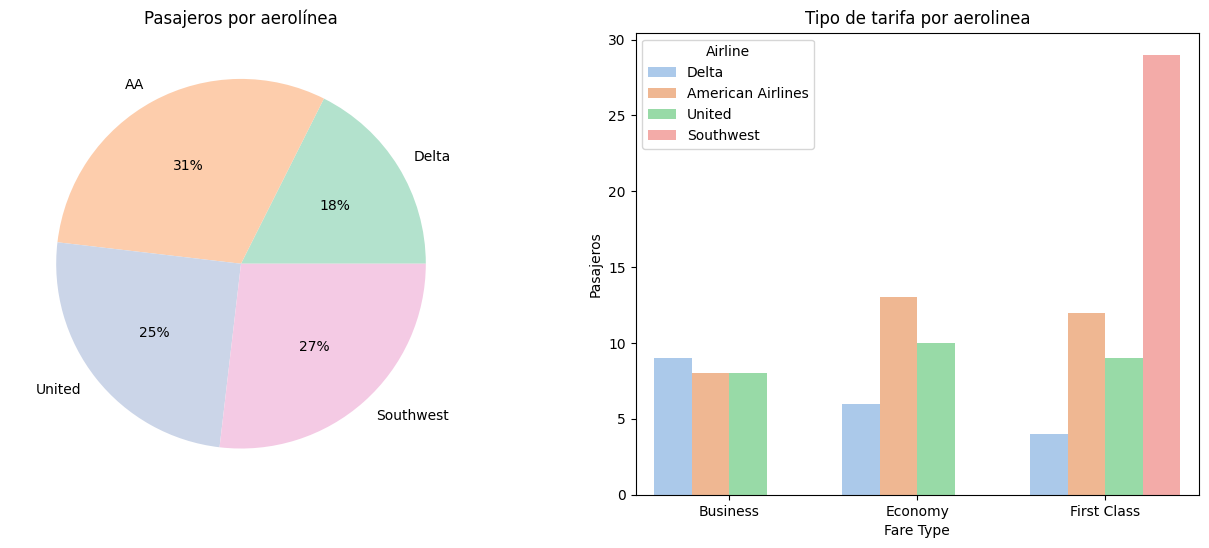

In [34]:
percent_people = pd.DataFrame({
    'Delta': filtered['Delta'].value_counts(normalize=True)[1],
    'AA': filtered['AA'].value_counts(normalize=True)[1],
    'United': filtered['United'].value_counts(normalize=True)[1],
}, index=[0])

percent_people = pd.concat([
    percent_people,
    pd.DataFrame({'Southwest': 1 - percent_people.sum(axis=1)[0]}, index=[0]),
], axis=1)

fig, (ax, ax2) = plt.subplots(1, 2, figsize = (16, 6))

ax.pie(percent_people.iloc[0].to_list(), labels = percent_people.columns.to_list(), autopct='%.0f%%', colors=plt.cm.Pastel2.colors)

#percent_people.plot(kind='barh', stacked=True, colormap='Blues', width=.25, ax=ax)
ax.set(title= 'Pasajeros por aerolínea')
ax.get_yaxis().set_visible(False)

sns.set_palette('pastel')
sns.countplot(original, hue='Airline', x='Fare Type', ax=ax2)
ax2.set(title='Tipo de tarifa por aerolinea', ylabel='Pasajeros');

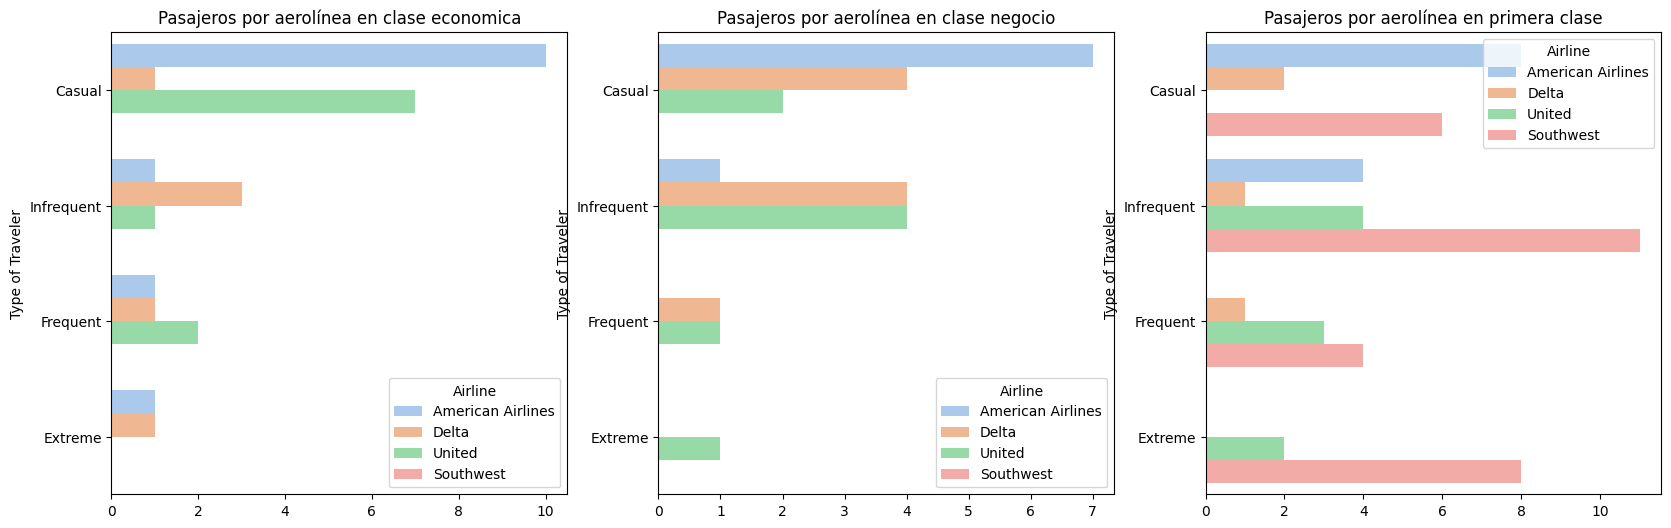

In [32]:
fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 6))
hue_order = ['American Airlines', 'Delta', 'United', 'Southwest']
order = ['Casual', 'Infrequent', 'Frequent', 'Extreme']

sns.set_palette('pastel')
sns.countplot(original.loc[original['Fare Type'].str.contains('Economy')], hue='Airline', y='Type of Traveler', ax=ax, hue_order=hue_order, order=order)
ax.set(title='Pasajeros por aerolínea en clase economica', xlabel='');

sns.countplot(original.loc[original['Fare Type'].str.contains('Business')], hue='Airline', y='Type of Traveler', ax=ax2, hue_order=hue_order, order=order)
ax2.set(title='Pasajeros por aerolínea en clase negocio', xlabel='');

sns.countplot(original.loc[original['Fare Type'].str.contains('First Class')], hue='Airline', y='Type of Traveler', ax=ax3, hue_order=hue_order, order=order)
ax3.set(title='Pasajeros por aerolínea en primera clase', xlabel='');

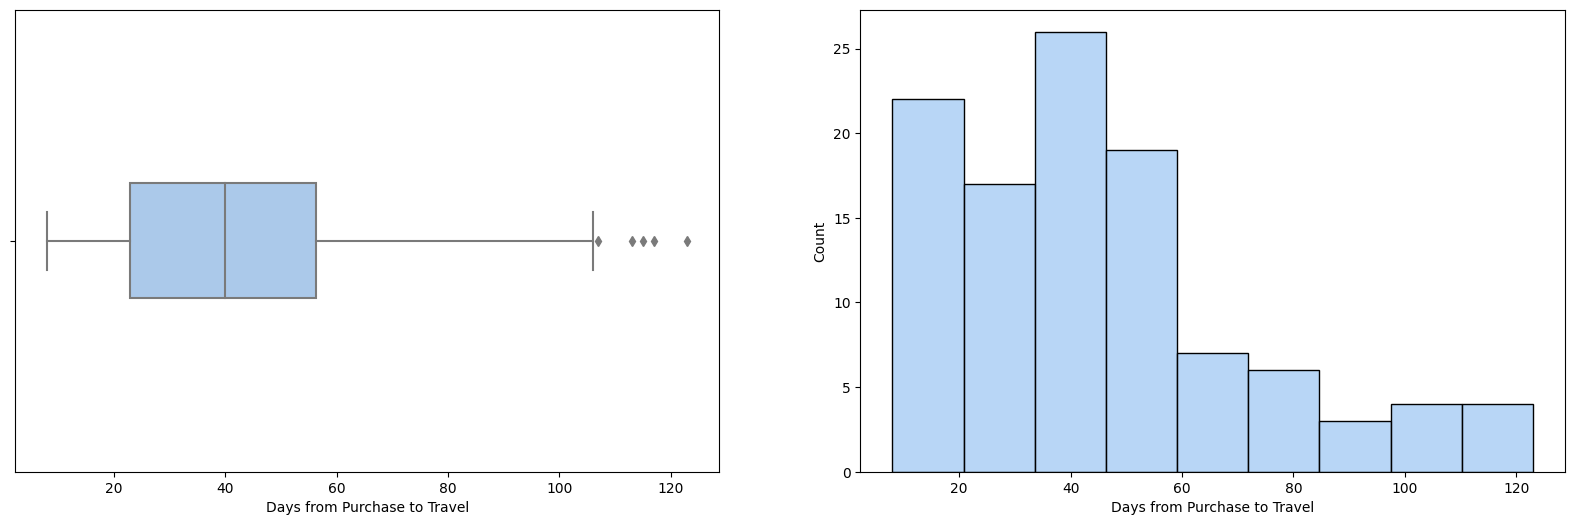

In [29]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (20, 6))

sns.boxplot(original, x='Days from Purchase to Travel', ax=ax, width=.25);
sns.histplot(original, x='Days from Purchase to Travel', ax=ax2);

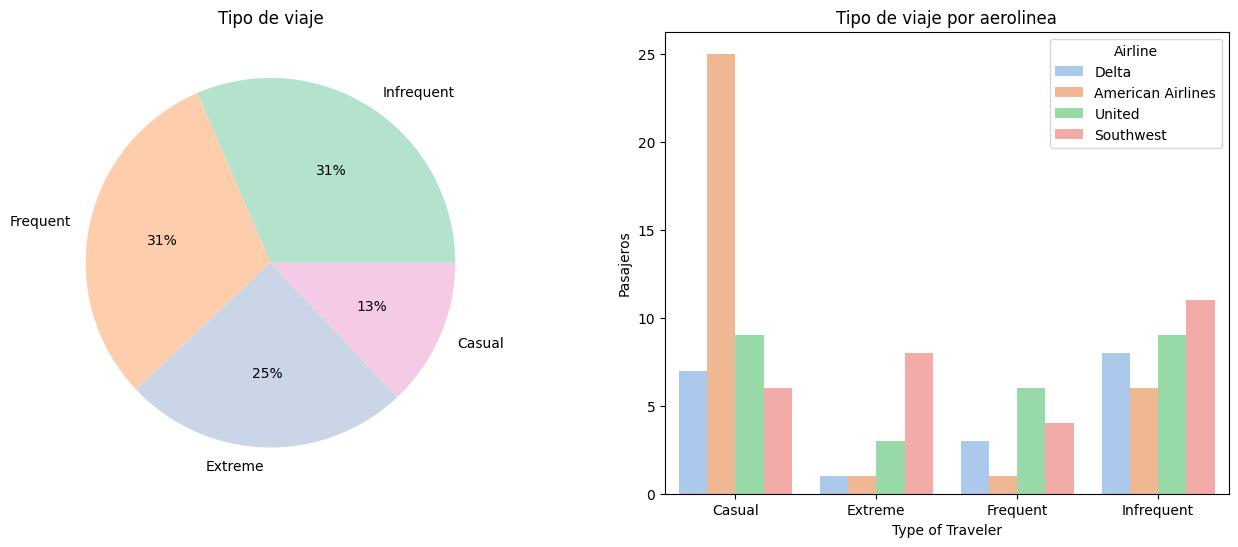

In [29]:
type_df = pd.DataFrame({
    'Infrequent': filtered['Infrequent'].value_counts(normalize=True)[1],
    'Frequent': filtered['AA'].value_counts(normalize=True)[1],
    'Extreme': filtered['United'].value_counts(normalize=True)[1],
}, index=[0])

type_df = pd.concat([
    type_df,
    pd.DataFrame({'Casual': 1 - type_df.sum(axis=1)[0]}, index=[0]),
], axis=1)

fig, (ax, ax2) = plt.subplots(1, 2, figsize = (16, 6))

ax.pie(type_df.iloc[0].to_list(), labels = type_df.columns.to_list(), autopct='%.0f%%', colors=plt.cm.Pastel2.colors)

#percent_people.plot(kind='barh', stacked=True, colormap='Blues', width=.25, ax=ax)
ax.set(title= 'Tipo de viaje')
ax.get_yaxis().set_visible(False)

sns.set_palette('pastel')
sns.countplot(original, hue='Airline', x='Type of Traveler', ax=ax2)
ax2.set(title='Tipo de viaje por aerolinea', ylabel='Pasajeros');

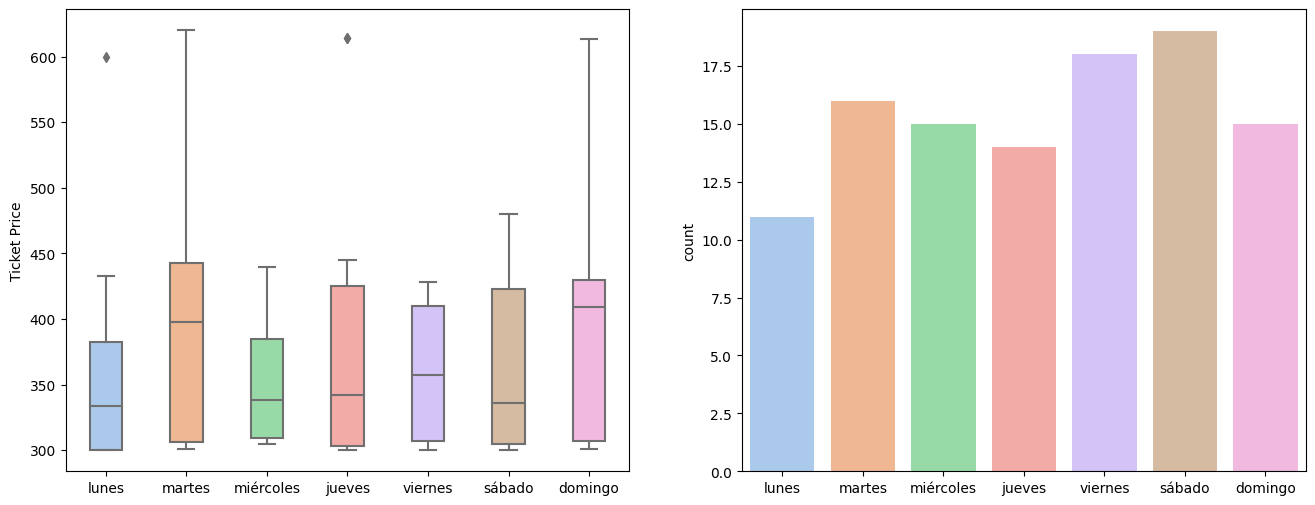

In [8]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize = (16, 6))

sns.boxplot(original, x='Dia.1', y='Ticket Price', ax=ax, width=.4, order=['lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo'])
ax.set(xlabel='');

sns.countplot(original, x='Dia.1', order=['lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo'], ax=ax2);
ax2.set(xlabel='');

In [26]:
ticket_info = original.loc[:, ['Ticket Price', 'Trips', 'Days from Purchase to Travel']].describe()

ticket_info

,Ticket Price,Trips,Days from Purchase to Travel
count,108.000000,108.000000,108.000000
mean,376.370370,7.750000,45.129630
std,86.460038,4.991816,26.917351
min,300.000000,1.000000,8.000000
25%,305.000000,4.000000,23.000000
50%,341.000000,6.000000,40.000000
75%,424.000000,10.250000,56.250000
max,620.000000,19.000000,123.000000


In [6]:
X = filtered.loc[:, filtered.columns != 'Ticket Price']
Y = filtered['Ticket Price']

XC = sm.add_constant(X)

model = sm.OLS(Y, XC).fit()
pred = model.predict(XC)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     9.387
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           1.56e-13
Time:                        16:39:03   Log-Likelihood:                -579.31
No. Observations:                 108   AIC:                             1195.
Df Residuals:                      90   BIC:                             1243.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          239.7242     40.593      5.906   

In [7]:
model.params.to_dict()

result = 'y = '

for key, value in model.params.to_dict().items():
    if (key == 'const'):
        result += f'{value}'
    else:
        result += f'{" + " if(value >= 0) else " "}{round(value, 2)}*{key}'

print(result)

y = 239.72422613505017 + 167.77*AA + 143.81*Delta + 176.75*United -0.4*DaysPurchase -33.69*Business + 84.35*First Class + 14.2*Origin -26.65*Lunes + 0.09*Martes -22.25*Miercoles + 9.56*Jueves -20.84*Viernes -19.06*Sabado + 2.85*Trips + 0.6*Infrequent -79.92*Frequent -54.37*Extreme


In [5]:
X2 = filtered.loc[:, ['AA', 'United', 'DaysPurchase', 'First Class', 'Frequent']]
Y2 = filtered['Ticket Price']

X2C = sm.add_constant(X2)

model2 = sm.OLS(Y2, X2C).fit()
pred2 = model2.predict(X2C)

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     13.57
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           3.81e-10
Time:                        16:38:59   Log-Likelihood:                -606.86
No. Observations:                 108   AIC:                             1226.
Df Residuals:                     102   BIC:                             1242.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          330.6682     19.060     17.349   

In [78]:
result2 = 'y = '

for key, value in model2.params.to_dict().items():
    if (key == 'const'):
        result2 += f'{value}'
    else:
        result2 += f'{" + " if(value >= 0) else " "}{round(value, 2)}*{key}'
        
print(result2)

y = 330.6681521231782 + 104.0*AA + 97.51*United -0.6*DaysPurchase + 44.05*First Class -40.7*Frequent


In [3]:
stack = filtered.corr().stack()
stack = stack[stack.index.get_level_values(0) != stack.index.get_level_values(1)]

stack['Ticket Price'].abs().sort_values(ascending=False)

AA              0.362682
DaysPurchase    0.258415
Trips           0.256126
Extreme         0.202628
United          0.200270
Frequent        0.193850
Martes          0.171748
Business        0.147254
Miercoles       0.126173
Viernes         0.080451
Origin          0.079771
First Class     0.078112
Delta           0.070089
Sabado          0.068676
Jueves          0.057597
Lunes           0.051963
Infrequent      0.029747
dtype: float64

In [8]:
model.get_influence().summary_frame()

,dfb_const,dfb_AA,dfb_Delta,dfb_United,dfb_DaysPurchase,dfb_Business,dfb_First Class,dfb_Origin,dfb_Lunes,dfb_Martes,...,dfb_Trips,dfb_Infrequent,dfb_Frequent,dfb_Extreme,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.279192,-0.139436,0.068241,-0.077738,-0.026264,0.207477,0.016782,-0.150875,-0.193712,-0.169313,...,-0.167581,-0.221524,0.094976,0.126869,0.016308,1.233124,0.161811,0.541801,1.236746,0.543393
1,0.132790,0.013594,-0.050971,-0.038658,0.093925,-0.067230,-0.087934,-0.026817,-0.092153,-0.110690,...,-0.083076,-0.057255,0.064641,0.071303,0.003899,0.646141,0.143896,0.264904,0.644037,0.264041
2,0.115406,-0.056505,-0.039919,0.026828,-0.033944,-0.046394,-0.067868,-0.028203,-0.082815,-0.077712,...,-0.030728,-0.042417,0.007061,0.022479,0.001970,0.421965,0.166066,0.188300,0.420029,0.187436
3,-0.212179,0.315883,0.141643,0.243514,-0.047586,0.042641,0.351328,-0.206019,-0.398239,-0.497665,...,0.456563,0.292996,-0.386856,-0.445346,0.044696,2.125828,0.151122,0.896953,2.169146,0.915230
4,-0.087206,0.103849,0.076677,0.063846,0.003971,-0.017287,-0.014340,0.084060,0.075946,0.082674,...,-0.010373,0.028889,0.028109,0.037745,0.002006,-0.465723,0.142729,-0.190031,-0.463688,-0.189201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,-0.002226,-0.005925,-0.006364,-0.012454,-0.008372,-0.002223,-0.001863,0.012601,-0.003651,0.000337,...,0.006870,0.005375,-0.003640,0.004596,0.000179,0.158742,0.113155,0.056703,0.157880,0.056395
104,0.076503,-0.136347,-0.130464,-0.197709,-0.020112,0.013197,-0.102709,-0.111204,0.019917,-0.015023,...,0.034456,0.030801,-0.010700,-0.105076,0.006517,-0.765357,0.166846,-0.342498,-0.763582,-0.341704
105,-0.011078,0.021186,0.050802,-0.006798,-0.024165,-0.080713,-0.002820,0.070369,0.002234,0.021304,...,0.012951,-0.040544,-0.026761,0.008303,0.002618,-0.503113,0.156949,-0.217079,-0.501016,-0.216174
106,0.016583,-0.010469,0.042928,-0.042969,-0.040970,-0.083663,0.027184,-0.075519,0.009834,0.030378,...,0.016149,-0.070803,-0.030114,0.006288,0.005780,-0.772390,0.148495,-0.322552,-0.770645,-0.321823


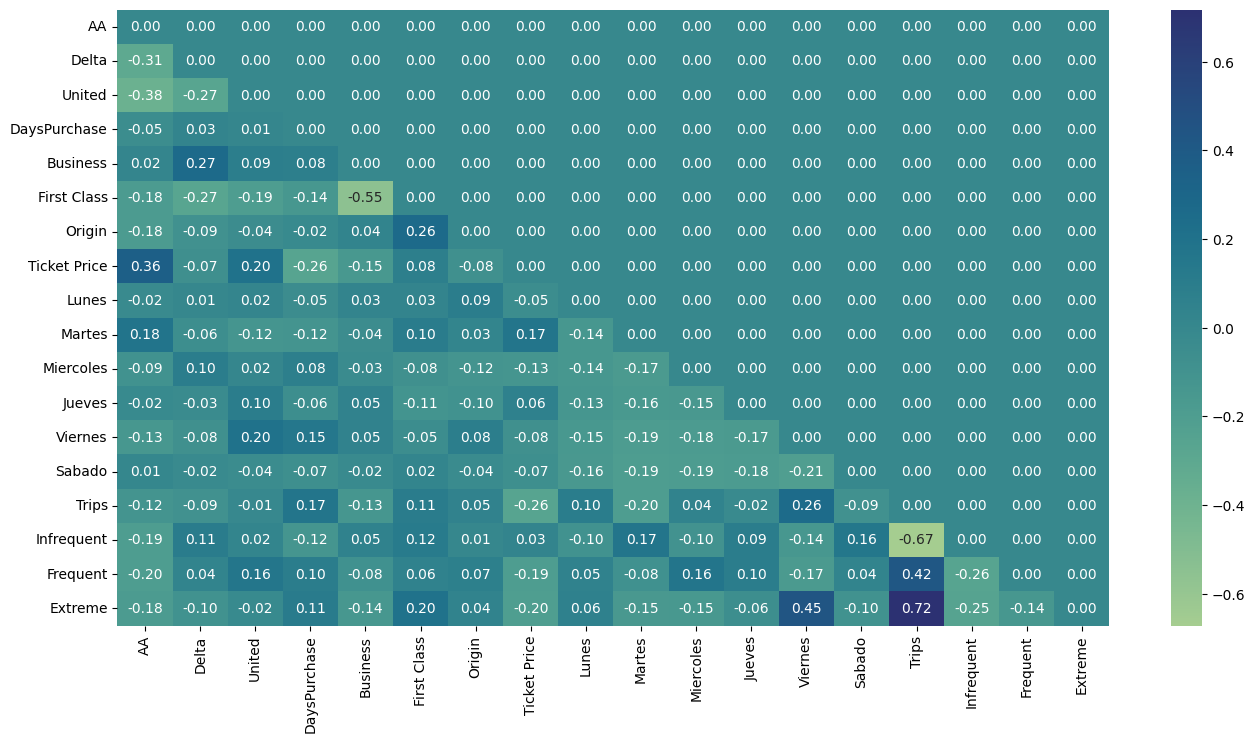

In [9]:
corr = filtered.corr()
corr[:] = np.tril(corr.values, k=-1)

fig, (ax) = plt.subplots(1, 1, figsize = (16, 8))
sns.heatmap(corr, annot=True, fmt=".2f", ax=ax, cmap="crest");

In [35]:
def graficar(X, Y, stan_res, model_loc):
    sns.set_style('white')
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
    ## STD Probability plot
    (quantiles, values), (slope, intercept, r) = stats.probplot(stan_res, dist='norm')
    ax1.plot(values, quantiles, 'ob')
    ax1.plot(quantiles * slope + intercept, quantiles, 'r')
    ax1.set_title('Normal probability plot')
    ax1.set_ylabel('Percent')
    ax1.set_xlabel('Standarized residual')
    ticks_percents=[1, 10, 50, 90, 99]
    ticks_quant = [stats.norm.ppf(i/100.) for i in ticks_percents]
    ax1.set_xticks([-2, 0, 2, 4])
    ax1.set_yticks(ticks_quant,ticks_percents)
    ax1.grid()

    ### Versus fits
    model_fitted_y = model_loc.fittedvalues
    sns.residplot(y=stan_res, x=model_fitted_y, ax=ax2)
    ax2.fill_between([240, 550], [1.2, 2.75], color="gray", alpha=0.24);
    ax2.fill_between([240, 550], [-1.2, -2.75], color="gray", alpha=0.24);
    ax2.set_title('Versus fits')
    ax2.set_ylabel('Fitted value')
    ax2.set_xlabel('Standirized residual')
    ax2.set_yticks([-2, 0, 2, 4])

    ### Histogram
    stan_res = model_loc.get_influence().resid_studentized_internal
    sns.histplot(stan_res, bins=10, ax=ax3)
    ax3.set_title('Histogram')
    ax3.set_ylabel('Frequency')
    ax3.set_xlabel('Standirized residual')
    ax3.set_yticks([0, 2.5, 5, 7.5, 10])

    ### Versus fits
    ax4.scatter(X.index, stan_res)
    ax4.plot(X.index, stan_res)
    ax4.set_title('Versus order')
    ax4.set_ylabel('Observation order')
    ax4.set_xlabel('Standirized residual')
    ax4.set_xticks(np.arange(0, 120, 10))
    ax4.set_yticks([-2, 0, 2, 4])

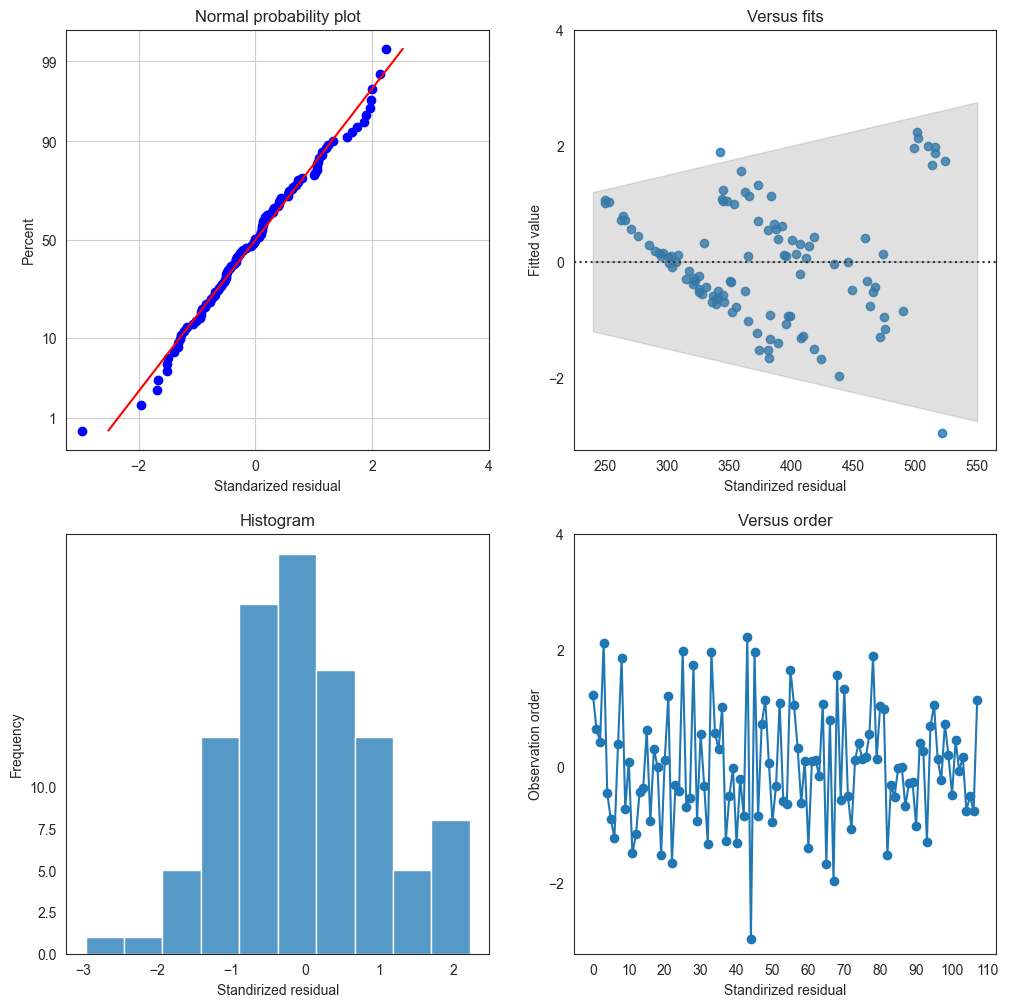

In [36]:
sd_residuals = model.get_influence().resid_studentized_internal

graficar(XC, Y, sd_residuals, model)